<span style="color:Orange;font-size:50px;"><strong>This is an investigation of the factors affecting the student scores and their overall performance at school</strong></span>

<span style="color:green; font-size:30px;"><strong> Part 2: Analysing the data  <strong></span>
 
<span style="color:black"><strong>   Author: Yehia Abdelaziz<strong></span>



### First we import the necessary libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Now we want to look at the relationship between the exam scores and different data features

<span style="color:green; font-size:20px;">Let's first look at the attendance. Surely you would excpect that students that have higher attendance are more likely to have higher exam score</span>

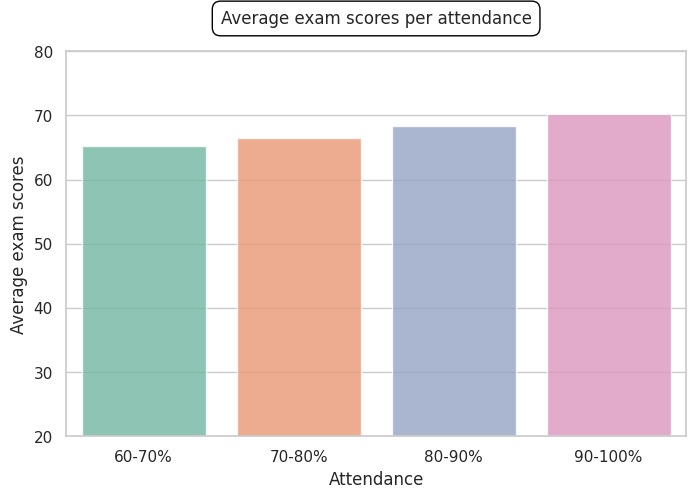

In [83]:
Attendance_categories = ['60-70%', '70-80%', '80-90%', '90-100%']

Attendance_average_male=[
df[df['Attendance'] <= 70]['Exam_Score'].mean(),
df[( df['Attendance'] > 70) & (df['Attendance'] <= 80)]['Exam_Score'].mean(),
df[( df['Attendance'] > 80) & (df['Attendance'] <= 90)]['Exam_Score'].mean(),
df[( df['Attendance'] > 90) & (df['Attendance'] <= 100)]['Exam_Score'].mean()
]


sns.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(8, 5))
#plt.bar(Attendance_categories, Attendance_count, color=['blue', 'orange', 'green', 'red'])
bars = sns.barplot(x=Attendance_categories, y=Attendance_average, palette='Set2', alpha=0.8,hue=Attendance_categories,legend=False)# Add title and labels
plt.title('Average exam scores per attendance',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Attendance')
plt.ylabel('Average exam scores')
plt.ylim(20,80)
#plt.text(1.9, 2500, 'Minimum attendance: {}%\nMaximum attendance: {}%\nAverage attendance: {:.2f}%'.format(df['Attendance'].min(),df['Attendance'].max(),df['Attendance'].mean()), fontsize=12, bbox=dict(facecolor='red', alpha=0.6))

# Show the plot
#plt.grid(axis='y', alpha=0.7)  # Optional: add gridlines for better readability
plt.show()

<span style="color:green; font-size:20px;">As we thought! </span> <br>
<span style="color:green; font-size:20px;">We would also expect the number of hours studied to be relevant </span>

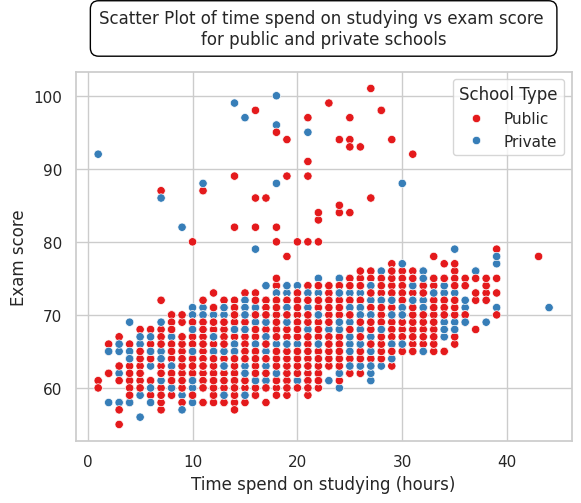

In [94]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score',hue='School_Type', data=df,palette='Set1')
# Add title and labels
plt.title('Scatter Plot of time spend on studying vs exam score \nfor public and private schools',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Time spend on studying (hours)')
plt.ylabel('Exam score')
plt.legend(title='School Type')
# Show the plot
plt.show()

<span style="color:green; font-size:20px;"> The number of hours studied is directly proportional to the exam score </span>

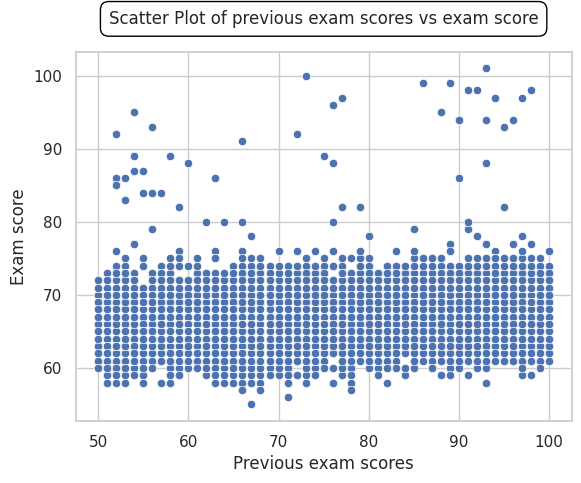

In [101]:
sns.scatterplot(x='Previous_Scores', y='Exam_Score' ,data=df)
# Add title and labels
plt.title('Scatter Plot of previous exam scores vs exam score',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Previous exam scores')
plt.ylabel('Exam score')
#plt.legend(title='School Type')
# Show the plot
plt.show()

<span style="color:green; font-size:20px;"> Looks like the effect of the previous exam scores is little! </span>

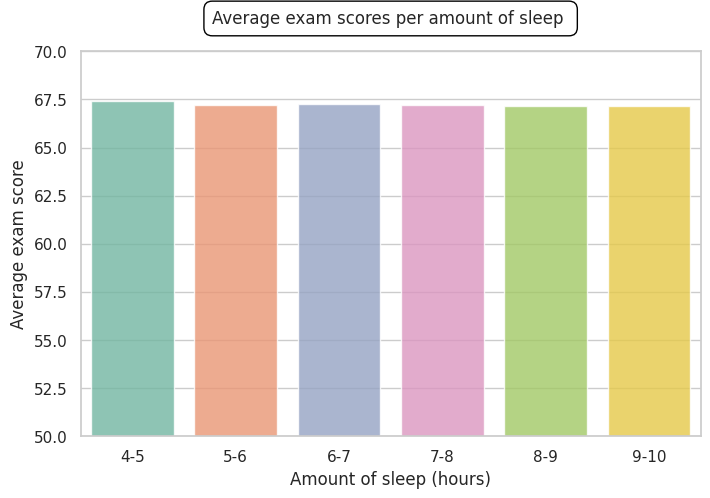

In [129]:

# Sample data
Sleep_categories = ['4-5', '5-6', '6-7','7-8','8-9','9-10',]

Sleep_count=[
df[df['Sleep_Hours'] <= 5]['Exam_Score'].mean(),
df[( df['Sleep_Hours'] > 5) & (df['Sleep_Hours'] <= 6)]['Exam_Score'].mean(),
df[( df['Sleep_Hours'] > 6) & (df['Sleep_Hours'] <= 7)]['Exam_Score'].mean(),
df[( df['Sleep_Hours'] > 7) & (df['Sleep_Hours'] <= 8)]['Exam_Score'].mean(),
df[( df['Sleep_Hours'] > 8) & (df['Sleep_Hours'] <=9 )]['Exam_Score'].mean(),
df[( df['Sleep_Hours'] > 9) & (df['Sleep_Hours'] <=10 )]['Exam_Score'].mean()


]
sns.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(8, 5))
#plt.bar(Attendance_categories, Attendance_count, color=['blue', 'orange', 'green', 'red'])
bars = sns.barplot(x=Sleep_categories, y=Sleep_count, palette='Set2', alpha=0.8,hue=Sleep_categories,legend=False)# Add title and labels
plt.title('Average exam scores per amount of sleep ',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Amount of sleep (hours)')
plt.ylabel('Average exam score')
plt.ylim(50,70)
#plt.text(3.5, 1500, 'Minimum sleep: {}h\nMaximum sleep: {}h\nAverage sleep: {:.2f}h'.format(df['Sleep_Hours'].min(),df['Sleep_Hours'].max(),df['Sleep_Hours'].mean()), fontsize=12, bbox=dict(facecolor='red', alpha=0.6))

# Show the plot
#plt.grid(axis='y', alpha=0.7)  # Optional: add gridlines for better readability
plt.show()

<span style="color:green; font-size:20px;"> Looks like the effect of the amount of sleep is little! </span>

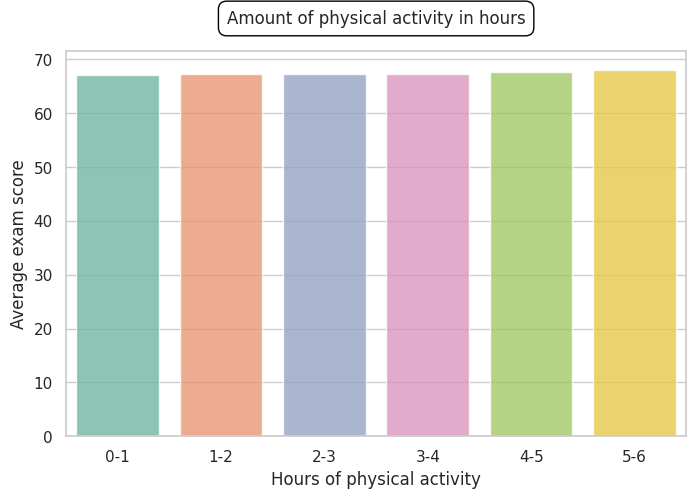

In [131]:

# Sample data
Physical_activity_categories = ['0-1','1-2', '2-3', '3-4','4-5','5-6']

Physical_activity_count=[
df[df['Physical_Activity'] <= 1]['Exam_Score'].mean(),
df[( df['Physical_Activity'] > 1) & (df['Physical_Activity'] <= 2)]['Exam_Score'].mean(),
df[( df['Physical_Activity'] > 2) & (df['Physical_Activity'] <= 3)]['Exam_Score'].mean(),
df[( df['Physical_Activity'] > 3) & (df['Physical_Activity'] <= 4)]['Exam_Score'].mean(),
df[( df['Physical_Activity'] > 4) & (df['Physical_Activity'] <=5 )]['Exam_Score'].mean(),
df[( df['Physical_Activity'] > 5) & (df['Physical_Activity'] <=6 )]['Exam_Score'].mean()
]

sns.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(8, 5))
#plt.bar(Attendance_categories, Attendance_count, color=['blue', 'orange', 'green', 'red'])
bars = sns.barplot(x=Physical_activity_categories, y=Physical_activity_count, palette='Set2', alpha=0.8,hue=Physical_activity_categories,legend=False)# Add title and labels
plt.title('Amount of physical activity in hours',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Hours of physical activity')
plt.ylabel('Average exam score')
#plt.text(2.7, 2065, 'Minimum physical activity: {}h\nMaximum physical activity: {}h\nAverage physical activity: {:.2f}h'.format(df['Physical_Activity'].min(),df['Physical_Activity'].max(),df['Physical_Activity'].mean()), fontsize=12, bbox=dict(facecolor='red', alpha=0.6))

# Show the plot
#plt.grid(axis='y', alpha=0.7)  # Optional: add gridlines for better readability
plt.show()


<span style="color:green; font-size:20px;"> Looks like the effect of the time spent on physical activity is little! </span>

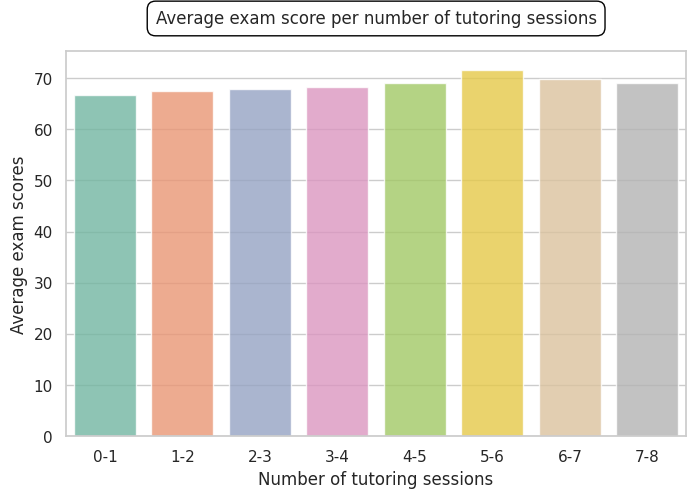

In [134]:

# Sample data
Tutoring_sessions_categories = ['0-1','1-2', '2-3', '3-4','4-5','5-6','6-7','7-8']

Tutoring_sessions_count=[
df[df['Tutoring_Sessions'] <= 1]['Exam_Score'].mean(),
df[( df['Tutoring_Sessions'] > 1) & (df['Tutoring_Sessions'] <= 2)]['Exam_Score'].mean(),
df[( df['Tutoring_Sessions'] > 2) & (df['Tutoring_Sessions'] <= 3)]['Exam_Score'].mean(),
df[( df['Tutoring_Sessions'] > 3) & (df['Tutoring_Sessions'] <= 4)]['Exam_Score'].mean(),
df[( df['Tutoring_Sessions'] > 4) & (df['Tutoring_Sessions'] <=5 )]['Exam_Score'].mean(),
df[( df['Tutoring_Sessions'] > 5) & (df['Tutoring_Sessions'] <=6 )]['Exam_Score'].mean(),
df[( df['Tutoring_Sessions'] > 6) & (df['Tutoring_Sessions'] <=7 )]['Exam_Score'].mean(),
df[( df['Tutoring_Sessions'] > 7) & (df['Tutoring_Sessions'] <=8 )]['Exam_Score'].mean(),



]
sns.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(8, 5))
#plt.bar(Attendance_categories, Attendance_count, color=['blue', 'orange', 'green', 'red'])
bars = sns.barplot(x=Tutoring_sessions_categories, y=Tutoring_sessions_count, palette='Set2', alpha=0.8,hue=Tutoring_sessions_categories,legend=False)# Add title and labels
plt.title('Average exam score per number of tutoring sessions',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Number of tutoring sessions')
plt.ylabel('Average exam scores')

# Show the plot
#plt.grid(axis='y', alpha=0.7)  # Optional: add gridlines for better readability
plt.show()

<span style="color:green; font-size:20px;"> The tutoring sessions improve the exam scores as expected!</span>
<br>
<span style="color:black; font-size:20px;"> Let's look at the access to resources and the parental involvement</span>

In [138]:
from scipy.stats import chi2_contingency

# Create a contingency table (same as above)
contingency_table = pd.crosstab(df['Access_to_Resources'], df['Parental_Involvement'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Chi2 Statistic: 9.94165796233686, p-value: 0.04142199721402106


<span style="color:green; font-size:20px;"> This two are correlated, so we can only look at one of them only</span>


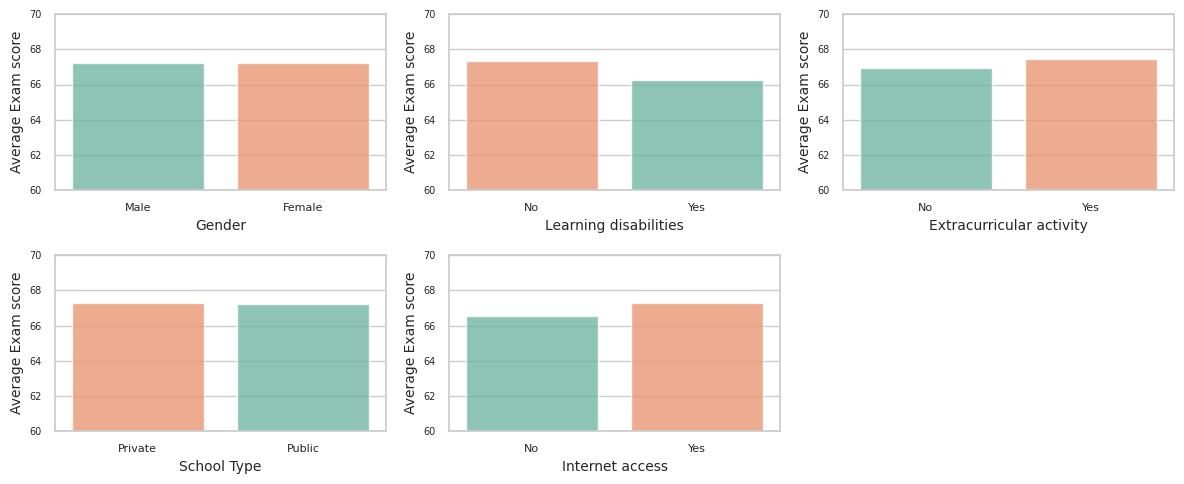

In [312]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.labelsize'] = 1

# Set seaborn style
sns.set(style="whitegrid")

##############################################################################################################################################
plt.subplot(2, 3, 1)
categories=['Male','Female']
category_average = [df.groupby('Gender')['Exam_Score'].mean()[1],
                    df.groupby('Gender')['Exam_Score'].mean()[0],
                  ]
bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
#plt.title('Average exam score\n per gender',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
##############################################################################################################################################
plt.subplot(2, 3, 2)
categories=['No','Yes']
# Extract data from DataFrame
category_average = [df.groupby('Learning_Disabilities')['Exam_Score'].mean()[0],
                   df.groupby('Learning_Disabilities')['Exam_Score'].mean()[1],
                  ]
bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
#plt.title('Average exam score \nper learning disabilities',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Learning disabilities',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
##############################################################################################################################################
plt.subplot(2, 3, 3)

categories=['No','Yes']
# Extract data from DataFrame
category_average = [df.groupby('Extracurricular_Activities')['Exam_Score'].mean()[0],
                   df.groupby('Extracurricular_Activities')['Exam_Score'].mean()[1],
                  ]
bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
#plt.title('Average exam score per\n extracurricular activity',pad='20',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel('Extracurricular activity',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
##############################################################################################################################################
plt.subplot(2, 3, 4)
categories=['Private','Public']
# Extract data from DataFrame
category_average = [df.groupby('School_Type')['Exam_Score'].mean()[0],
                   df.groupby('School_Type')['Exam_Score'].mean()[1],
                  ]

bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
plt.xlabel('School Type',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
##############################################################################################################################################
plt.subplot(2, 3, 5)

categories=['No','Yes']
# Extract data from DataFrame
category_average = [df.groupby('Internet_Access')['Exam_Score'].mean()[0],
                   df.groupby('Internet_Access')['Exam_Score'].mean()[1],
                  ]

bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
plt.xlabel('Internet access',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)



plt.tight_layout()
plt.show()

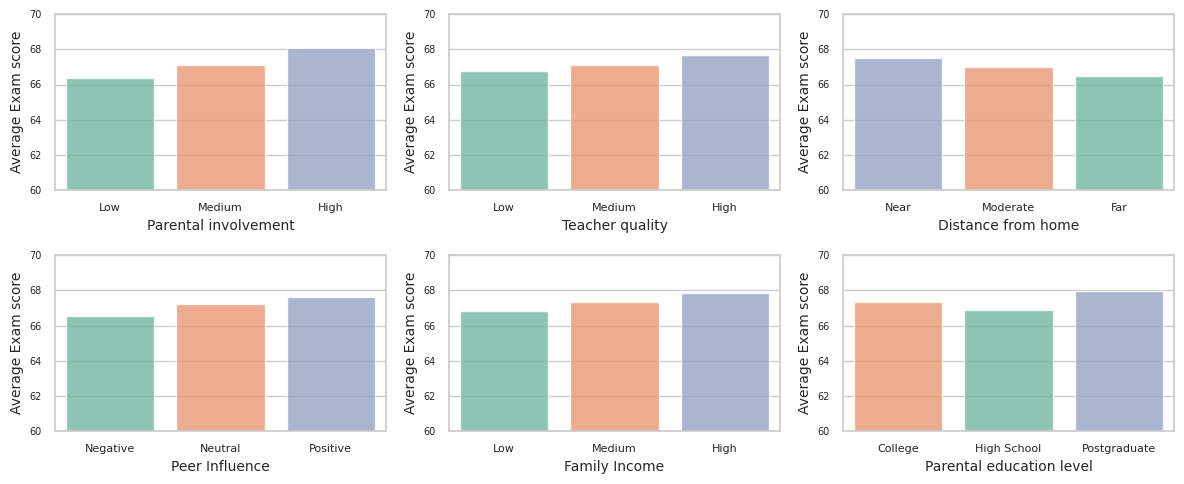

In [308]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.labelsize'] = 50
plt.rcParams['font.size'] = 1

# Set seaborn style
sns.set(style="whitegrid")
##############################################################################################################
plt.subplot(2,3,1)
categories=['Low','Medium','High']
# Extract data from DataFrame
category_average = [df.groupby('Parental_Involvement')['Exam_Score'].mean()[1],
                   df.groupby('Parental_Involvement')['Exam_Score'].mean()[2],
                   df.groupby('Parental_Involvement')['Exam_Score'].mean()[0],
                  ]

# Create a bar plot
bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
plt.xlabel('Parental involvement',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
################################################################################################################
plt.subplot(2,3,2)
categories=['Low','Medium','High']
# Extract data from DataFrame
category_average = [df.groupby('Teacher_Quality')['Exam_Score'].mean()[1],
                   df.groupby('Teacher_Quality')['Exam_Score'].mean()[2],
                   df.groupby('Teacher_Quality')['Exam_Score'].mean()[0],
                  ]

bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
plt.xlabel('Teacher quality',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
################################################################################################################
plt.subplot(2,3,3)

categories=['Near','Moderate','Far']
# Extract data from DataFrame
category_average = [df.groupby('Distance_from_Home')['Exam_Score'].mean()[2],
                    df.groupby('Distance_from_Home')['Exam_Score'].mean()[1],
                    df.groupby('Distance_from_Home')['Exam_Score'].mean()[0],
                  ]
bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
plt.xlabel('Distance from home',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
################################################################################################################
plt.subplot(2,3,4)
categories=['Negative','Neutral','Positive']
# Extract data from DataFrame
category_average = [df.groupby('Peer_Influence')['Exam_Score'].mean()[0],
                    df.groupby('Peer_Influence')['Exam_Score'].mean()[1],
                    df.groupby('Peer_Influence')['Exam_Score'].mean()[2],
                  ]

# Create a bar plot
bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
plt.xlabel('Peer Influence',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
################################################################################################################
plt.subplot(2,3,5)
categories=['Low','Medium','High']
# Extract data from DataFrame
category_average = [df.groupby('Family_Income')['Exam_Score'].mean()[1],
                    df.groupby('Family_Income')['Exam_Score'].mean()[2],
                    df.groupby('Family_Income')['Exam_Score'].mean()[0],
                  ]
bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
plt.xlabel('Family Income',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
################################################################################################################
plt.subplot(2,3,6)
categories=['College','High School','Postgraduate']
# Extract data from DataFrame
category_average = [df.groupby('Parental_Education_Level')['Exam_Score'].mean()[0],
                    df.groupby('Parental_Education_Level')['Exam_Score'].mean()[1],
                    df.groupby('Parental_Education_Level')['Exam_Score'].mean()[2],
                  ]

# Create a bar plot
#plt.bar(Attendance_categories, Attendance_count, color=['blue', 'orange', 'green', 'red'])
bars = sns.barplot(x=categories, y=category_average, palette='Set2', alpha=0.8,hue=category_average,legend=False)# Add title and labels
plt.xlabel('Parental education level',fontsize=10)
plt.ylabel('Average Exam score',fontsize=10)
plt.yticks(fontsize=7)
plt.xticks(fontsize=8)
plt.ylim(60,70)
plt.tight_layout()
plt.show()